In [125]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [126]:
train_data = pd.read_csv("train.csv")

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [128]:
train_data.shape

(100000, 12)

In [129]:
train_data[train_data['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
215,215,0,1,"Partida, William",male,0.83,1,0,27228,10.53,NaN,S
228,228,1,3,"Kabel, Rosa",female,0.50,1,2,201054,33.92,NaN,S
415,415,1,2,"Blakey, Sandra",female,0.75,1,2,439368,34.37,NaN,S
444,444,1,1,"Winterbottom, Velma",female,0.50,1,1,347054,32.83,C4421,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99307,99307,1,2,"Keyser, William",male,0.25,0,1,21907,71.57,NaN,S
99527,99527,0,3,"Lawrence, Barry",male,0.92,1,1,439308,8.45,NaN,S
99601,99601,0,3,"Smith, Roxanne",female,0.17,1,2,435887,67.06,NaN,C
99839,99839,1,3,"Lewis, Jeffrey",male,0.83,1,1,14319,13.95,NaN,C


# Context

The dataset contains information about passengers of Titanic. 

Labels to note:

Survived - survival (0 = No; 1 = Yes)

Pclass - passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - name

Sex - sex

Age - age

SibSp - number of siblings/spouses aboard

Parch - number of parents/children aboard

Ticket - ticket number

Fare - passenger fare

Cabin - cabin

Embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Data quality assessment

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [132]:
# удаляем неполные данные
test = train_data.copy()
test = test.dropna(axis=0, how='any')
pd.isna(test).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30881 entries, 8 to 99995
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  30881 non-null  int64  
 1   Survived     30881 non-null  int64  
 2   Pclass       30881 non-null  int64  
 3   Name         30881 non-null  object 
 4   Sex          30881 non-null  object 
 5   Age          30881 non-null  float64
 6   SibSp        30881 non-null  int64  
 7   Parch        30881 non-null  int64  
 8   Ticket       30881 non-null  object 
 9   Fare         30881 non-null  float64
 10  Cabin        30881 non-null  object 
 11  Embarked     30881 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.1+ MB


In [134]:
# удаляем дубликаты, если они есть
test = test.drop_duplicates(subset=['Name','Ticket'], keep='first', inplace=False, ignore_index=False)

Проверим содержимое столбцов

In [135]:
set(test['Survived'].values)

{0, 1}

In [136]:
set(test['Pclass'].values)

{1, 2, 3}

In [137]:
set(test['Sex'].values)

{'female', 'male'}

In [138]:
#print(sorted(set(test['Age'].values)))

In [139]:
#set(test['SibSp'].values)

In [140]:
#print(set(test['Cabin'].values))

In [150]:
print(set(test['Embarked'].values))

{'C', 'Q', 'S'}


In [141]:
test.groupby(by='Name')['Ticket'].count().sort_values(ascending=False)

Name
Smith, John         8
Smith, James        8
Williams, Mary      7
Smith, Mary         6
Moore, David        6
                   ..
Gordon, Marie       1
Gordon, Margaret    1
Gordon, Keith       1
Gordon, Karl        1
Zych, Maria         1
Name: Ticket, Length: 29965, dtype: int64

In [142]:
test[test['Name'] == "Smith, John"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20855,20855,0,1,"Smith, John",male,59.0,0,2,356053,82.67,A9998,S
35173,35173,0,1,"Smith, John",male,36.0,0,3,467643,72.04,C13666,S
39793,39793,0,1,"Smith, John",male,42.0,1,0,196726,142.59,A5807,C
40548,40548,0,1,"Smith, John",male,47.0,0,0,424247,200.30,C4811,C
56345,56345,1,1,"Smith, John",male,49.0,0,0,PC 26841,215.16,B4955,C
58294,58294,0,1,"Smith, John",male,38.0,0,0,185657,227.90,C22302,C
93274,93274,0,1,"Smith, John",male,42.0,1,1,46625,64.16,A17159,S
98006,98006,0,3,"Smith, John",male,3.0,0,0,SOTON/O2 326669,29.64,A19702,S


In [143]:
test.groupby(by='Ticket')['Name'].count().sort_values(ascending=False)

Ticket
PC           7
28380        5
26616        5
20851        5
25926        5
            ..
32686        1
326840       1
326781       1
32672        1
WE/P 7741    1
Name: Name, Length: 27951, dtype: int64

In [144]:
test[test['Ticket'] == "28380"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9021,9021,0,1,"Thompson, Jay",male,20.0,0,0,28380,198.92,A16263,S
14845,14845,0,3,"Alicea, William",male,32.0,0,0,28380,26.23,E4266,S
44543,44543,0,1,"Hunter, Joel",male,25.0,0,0,28380,58.38,C17566,Q
50019,50019,1,3,"Morgan, Alice",female,33.0,0,1,28380,56.25,D4793,C
67177,67177,0,1,"Ross, Glenda",female,57.0,0,1,28380,32.90,D11036,C


По одному билету скорее всего не могло быть столько пассажиров, поэтому удалим дубликаты по билету

In [145]:
test = test.drop_duplicates(subset=['Ticket'], keep='first', inplace=False, ignore_index=False)

In [146]:
test.shape

(27951, 12)

In [147]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C
11,11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S
12,12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S
14,14,1,1,"Seaton, Karen",female,44.0,0,1,12425,28.40,D6945,C


In [148]:
# преобразование данных в графе "Возраст"
test['Age'] = test['Age'].map(lambda x: int(x))

In [149]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,8,0,1,"Wardlaw, Michael",male,27,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66,0,0,6981,9.14,D2969,C
11,11,0,1,"Telschow, Robert",male,60,0,0,19600,31.50,A9055,S
12,12,0,3,"Stewart, Pat",male,36,0,0,434108,9.34,C8674,S
14,14,1,1,"Seaton, Karen",female,44,0,1,12425,28.40,D6945,C


Вопрос: как отделить команду от пассажиров? остается открытым

# Data exploration

In [152]:
# распрелеление выживших
test.groupby(by='Survived')['PassengerId'].count()

Survived
0    11008
1    16943
Name: PassengerId, dtype: int64

Text(0.5, 0, 'Lost / Survived')

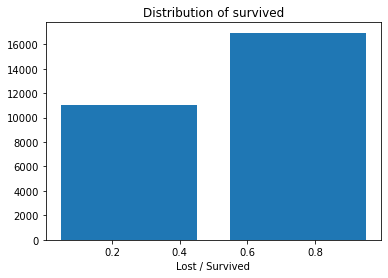

In [170]:
plt.title("Distribution of survived")

plt.hist(test.Survived, bins=2, rwidth=0.8,  label='Survived')
plt.xlabel('Lost / Survived')


In [162]:
# выжившие по классам
test.groupby(by=['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          8905
          2           972
          3          1131
1         1         14120
          2          2101
          3           722
Name: PassengerId, dtype: int64

In [164]:
# выжившие по полу
test.groupby(by=['Survived','Sex'])['PassengerId'].count()

Survived  Sex   
0         female     3524
          male       7484
1         female    12253
          male       4690
Name: PassengerId, dtype: int64

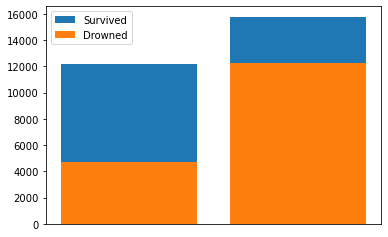

In [166]:
plt.hist(test.Sex, bins=2, rwidth=0.8, stacked=True, label='Survived')
plt.hist(test[test.Survived == 1].Sex, bins=2,rwidth = 0.8, label='Drowned')
plt.legend()

In [165]:
# выжившие по классам
test.groupby(by=['Survived','Pclass','Sex'])['PassengerId'].count()

Survived  Pclass  Sex   
0         1       female     2958
                  male       5947
          2       female      324
                  male        648
          3       female      242
                  male        889
1         1       female    10008
                  male       4112
          2       female     1730
                  male        371
          3       female      515
                  male        207
Name: PassengerId, dtype: int64

# Summary